<a href="https://colab.research.google.com/github/nivedanyakolli361/CNN1/blob/main/Models/OKC5_New_upload_Accuracy_93.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
device__list = tf.test.gpu_device_name()
device__list

'/device:GPU:0'

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
import sys 
print(sys.version)

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Part 1 - Building the CNN
# Multiple Inputs
import numpy as np
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input, BatchNormalization
from keras.layers import Dense, Dropout 
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
import glob 
import cv2
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [ ]:
path_NonOKC_1[295:300]

['/content/drive/MyDrive/OKC_and_NonOKC_Dataset/Training/Non-OKC/Non-OKC_295.jpg',
 '/content/drive/MyDrive/OKC_and_NonOKC_Dataset/Training/Non-OKC/Non-OKC_296.jpg',
 '/content/drive/MyDrive/OKC_and_NonOKC_Dataset/Training/Non-OKC/Non-OKC_297.jpg',
 '/content/drive/MyDrive/OKC_and_NonOKC_Dataset/Training/Non-OKC/Non-OKC_298.jpg',
 '/content/drive/MyDrive/OKC_and_NonOKC_Dataset/Training/Non-OKC/Non-OKC_299.jpg']

In [ ]:
path_NonOKC_2[295:300]

['/content/drive/MyDrive/Canny/Training/Non-OKC/Non-OKC_295.jpg',
 '/content/drive/MyDrive/Canny/Training/Non-OKC/Non-OKC_296.jpg',
 '/content/drive/MyDrive/Canny/Training/Non-OKC/Non-OKC_297.jpg',
 '/content/drive/MyDrive/Canny/Training/Non-OKC/Non-OKC_298.jpg',
 '/content/drive/MyDrive/Canny/Training/Non-OKC/Non-OKC_299.jpg']

In [4]:
path_NonOKC_1 = glob.glob('/content/drive/MyDrive/OKC_and_NonOKC_Dataset/Training/Non-OKC/*')
path_NonOKC_2 = glob.glob('/content/drive/MyDrive/Canny/Training/Non-OKC/*')

path_OKC_1 = glob.glob('/content/drive/MyDrive/OKC_and_NonOKC_Dataset/Training/OKC/*')
path_OKC_2 = glob.glob('/content/drive/MyDrive/Canny/Training/OKC/*')

x_data= []
y_data = []

def loaddate(x_data,y_data,path1, n):
  print(len(path1))
  for i in path1[:]:
    image= cv2.imread(i)
    image=cv2.resize(image,(256,256))
    x_data.append(image)
    y_data.append(n)
  return x_data,y_data

x_img, y_img  = loaddate([], [], path_NonOKC_1, 0) #
x_img, y_img  = loaddate(x_img, y_img, path_OKC_1, 1) 

x_img = np.array(x_img)
y_img = np.array(y_img)


x_canny, y_canny  = loaddate([], [], path_NonOKC_2, 0) 
x_canny, y_canny  = loaddate(x_canny, y_canny, path_OKC_2, 1)

x_canny = np.array(x_canny)
y_canny = np.array(y_canny)


#X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(x_img, y_img, random_state=0, train_size =0.2)

#X_train_canny, X_test_canny, y_train_canny, y_test_canny = train_test_split(x_canny, y_canny, random_state=0, train_size =0.2)

865
1138
865
1138


In [ ]:
print(len(path_NonOKC_1))
print(len(path_NonOKC_2))

865
865


In [ ]:
print(len(path_OKC_1))
print(len(path_OKC_2))

1138
1138


In [ ]:
print( len(x_img))
print( len(y_img))

2003
2003


In [ ]:
print( len(x_canny))
print( len(y_canny))

2003
2003


In [5]:
X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(x_img, y_img, random_state=0, train_size =0.8)

X_train_canny, X_test_canny, y_train_canny, y_test_canny = train_test_split(x_canny, y_canny, random_state=0, train_size =0.8)

In [ ]:
X_train_img.shape

(1602, 256, 256, 3)

In [ ]:
X_test_img.shape

(401, 256, 256, 3)

In [ ]:
y_train_img.shape

(1602,)

In [ ]:
y_test_img.shape

(401,)

In [ ]:
X_train_canny.shape

(1602, 256, 256, 3)

In [ ]:
X_test_canny.shape

(401, 256, 256, 3)

In [ ]:
y_train_canny.shape

(1602,)

In [ ]:
y_test_canny.shape

(401,)

In [ ]:
# learning rate
LEARN_RATE = 1.0e-4

In [31]:
# first input model
visible1 = Input(shape=(256,256,3))
print(visible1.shape)

conv11 = Conv2D(64, kernel_size=3, activation='relu')(visible1)
x11     = BatchNormalization(axis=-1, momentum=0.99)(conv11)
print(conv11.shape)
pool11 = MaxPooling2D(pool_size=(3, 3))(x11)
print(pool11.shape)

conv12 = Conv2D(32, kernel_size=3, activation='relu')(pool11)
x12     = BatchNormalization(axis=-1, momentum=0.99)(conv12)
print(conv12.shape)
pool12 = MaxPooling2D(pool_size=(3, 3))(x12)
print(pool12.shape)

conv13 = Conv2D(16, kernel_size=3, activation='relu')(pool12)
x13     = BatchNormalization(axis=-1, momentum=0.99)(conv13)
print(conv13.shape)
pool13 = MaxPooling2D(pool_size=(3, 3))(x13)
print(pool13.shape)

flat1 = Flatten()(pool13)

# second input model
visible2 = Input(shape=(256,256,3))

conv21 = Conv2D(64, kernel_size=3, activation='relu')(visible2)
x21     = BatchNormalization(axis=-1,momentum=0.99)(conv21)
pool21 = MaxPooling2D(pool_size=(3, 3))(x21)

conv22 = Conv2D(32, kernel_size=3, activation='relu')(pool21)
x21     = BatchNormalization(axis=-1,momentum=0.99)(conv22)
pool22 = MaxPooling2D(pool_size=(3, 3))(x21)

conv23 = Conv2D(16, kernel_size=3, activation='relu')(pool22)
x23     = BatchNormalization(axis=-1,momentum=0.99)(conv23)
pool23 = MaxPooling2D(pool_size=(3, 3))(x23)

flat2 = Flatten()(pool23)

# merge input models
merge = concatenate([flat1, flat2])


# interpretation model

hidden1 = Dense(50, activation='relu')(merge)
drop1 = Dropout(0.35)(hidden1)

hidden2 = Dense(20, activation='relu')(drop1)

drop2 = Dropout(0.2)(hidden2)

output = Dense(1, activation='sigmoid')(drop2)

model = Model(inputs=[visible1, visible2], outputs=output)

(None, 256, 256, 3)
(None, 254, 254, 64)
(None, 84, 84, 64)
(None, 82, 82, 32)
(None, 27, 27, 32)
(None, 25, 25, 16)
(None, 8, 8, 16)


In [61]:
# summarize layers
print(model.summary())

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_10 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 254, 254, 64  1792        ['input_9[0][0]']                
                                )                                                           

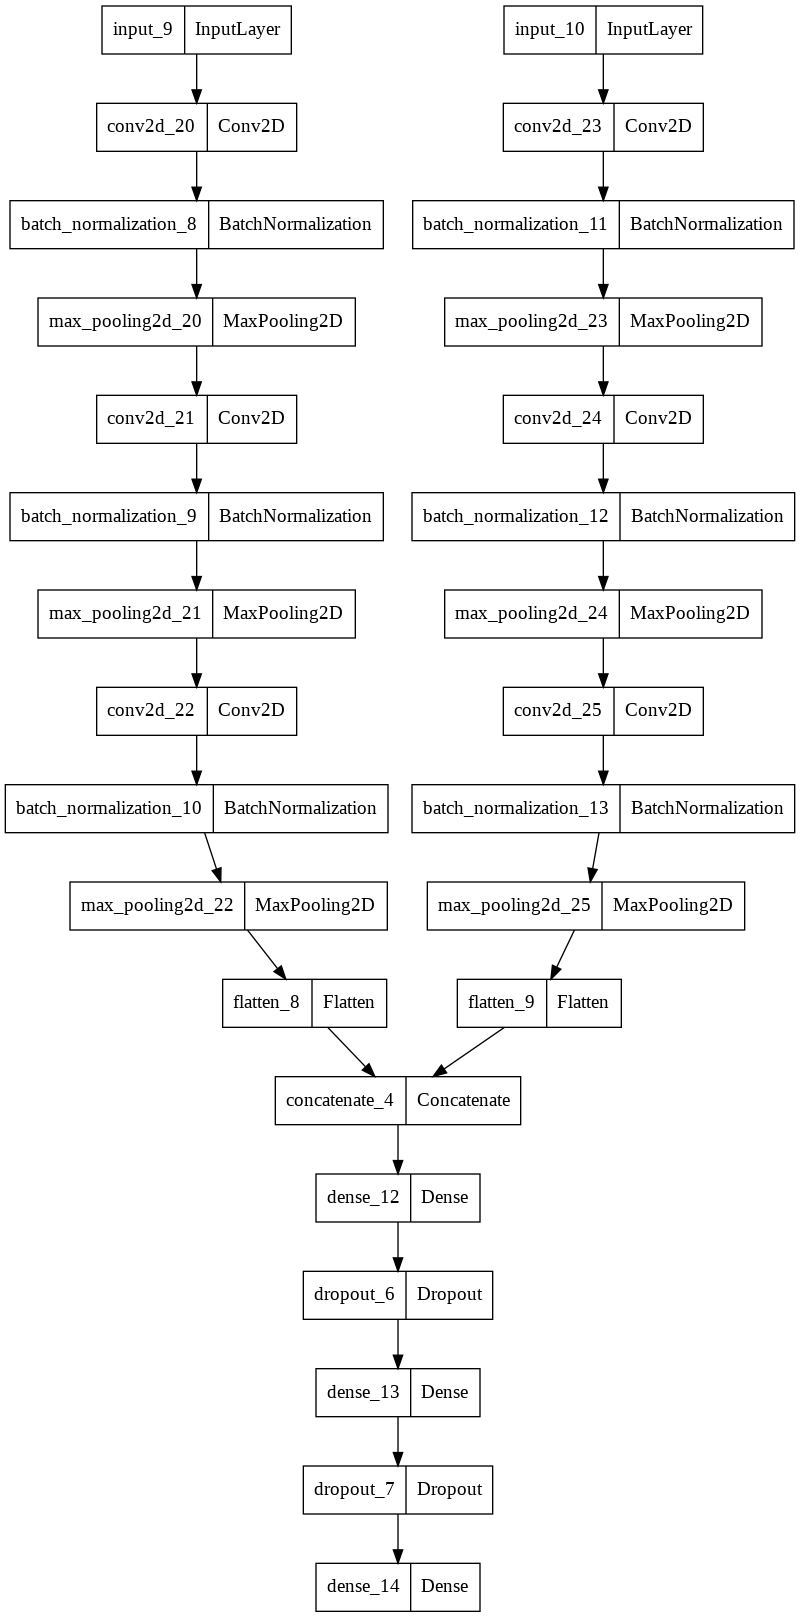

In [62]:
# plot graph
plot_model(model, to_file='/content/drive/MyDrive/Canny/multiple_inputs_Acc_93.2.png')

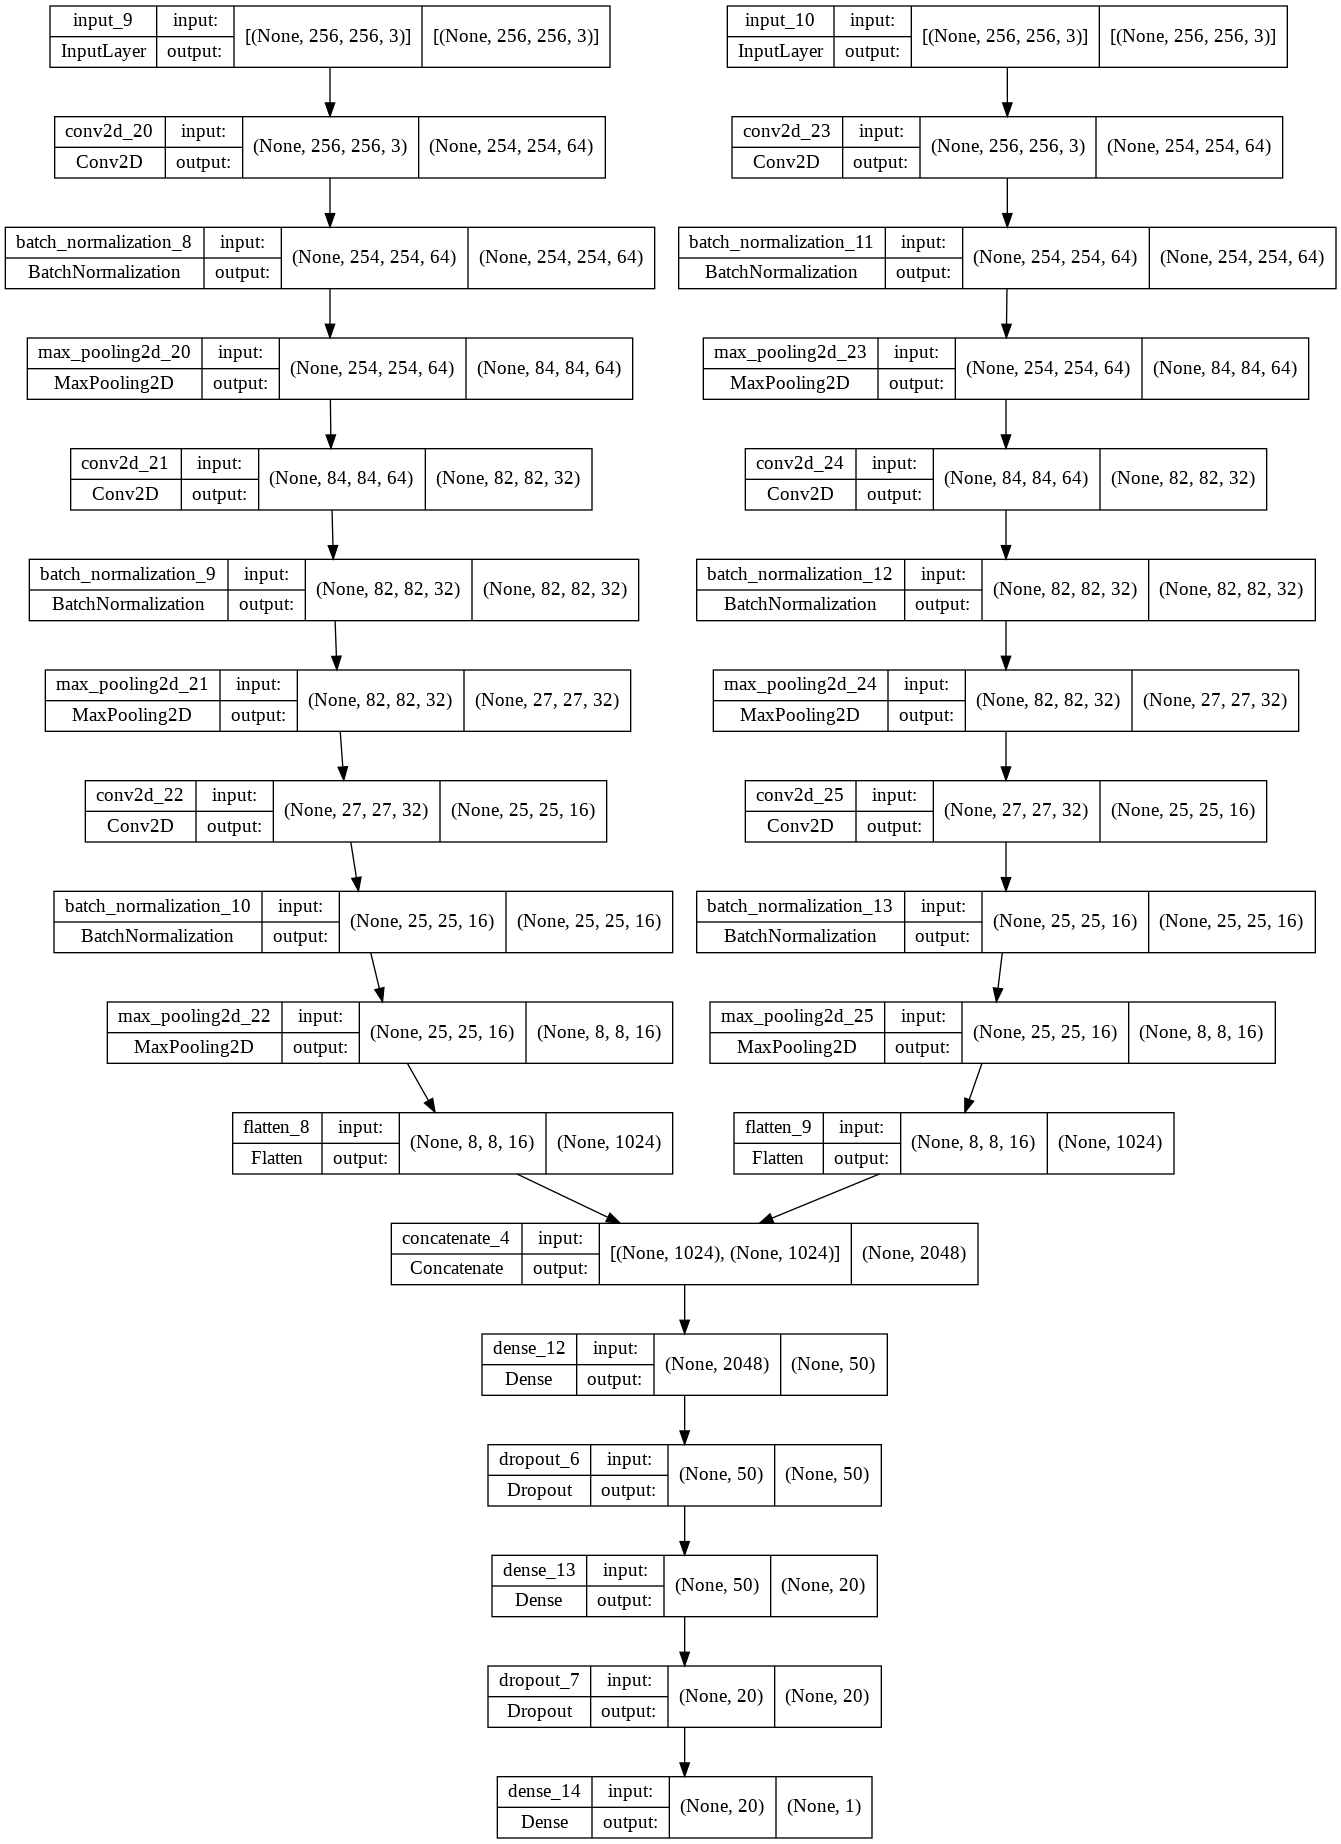

In [63]:
plot_model(model, to_file='/content/drive/MyDrive/Canny/model_plot_Acc_93.2.png', show_shapes=True, show_layer_names=True)

In [33]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('/content/drive/MyDrive/Canny/best_model_improved.h5',  # model filename
                             monitor='val_loss',                                     # quantity to monitor
                             verbose=0,                                              # verbosity - 0 or 1
                             save_best_only= True,                                   # The latest best model will not be overwritten
                             mode='auto')                                            # The decision to overwrite model is made 
                                                                                     # automatically depending on the quantity to monitor 

In [34]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy', 
              metrics=['accuracy'])

In [39]:
history=model.fit([X_train_img, X_train_canny],y_train_img, 
                  validation_data =([X_test_img,X_test_canny],y_test_img), 
                  epochs = 23, 
                  batch_size=16,
                  steps_per_epoch=len(X_train_img)//16,
                  validation_steps=len(X_test_img)//16,
                  callbacks=[checkpoint],
                  verbose=1
                  )

Epoch 1/23
100/100 [==============================] - 9s 89ms/step - loss: 0.0243 - accuracy: 0.9900 - val_loss: 0.5426 - val_accuracy: 0.8925
Epoch 2/23
100/100 [==============================] - 9s 87ms/step - loss: 0.0530 - accuracy: 0.9887 - val_loss: 1.5057 - val_accuracy: 0.7775
Epoch 3/23
100/100 [==============================] - 9s 86ms/step - loss: 0.0185 - accuracy: 0.9943 - val_loss: 0.2310 - val_accuracy: 0.9325
Epoch 4/23
100/100 [==============================] - 9s 87ms/step - loss: 0.0095 - accuracy: 0.9975 - val_loss: 0.1764 - val_accuracy: 0.9550
Epoch 5/23
100/100 [==============================] - 9s 87ms/step - loss: 0.0160 - accuracy: 0.9931 - val_loss: 0.9815 - val_accuracy: 0.8575
Epoch 6/23
100/100 [==============================] - 9s 86ms/step - loss: 0.0182 - accuracy: 0.9918 - val_loss: 0.2353 - val_accuracy: 0.9450
Epoch 7/23
100/100 [==============================] - 9s 87ms/step - loss: 0.0126 - accuracy: 0.9924 - val_loss: 0.6785 - val_accuracy: 0.8725

In [ ]:
X_train_canny[5:10].shape

(5, 512, 512, 3)

In [ ]:
y_train_img[5:10]

array([1, 0, 1, 1, 1])

In [ ]:
predictions = model.predict([X_train_img,X_train_canny])

In [ ]:
len(predictions)

1602

In [ ]:
len(X_train_img)

1602

In [40]:
# Evaluate the best model with testing data.
print(model.evaluate(x=[X_test_img,X_test_canny],y= y_test_img))

13/13 [==============================] - 1s 37ms/step - loss: 0.3145 - accuracy: 0.9327
[0.3144765794277191, 0.9326683282852173]


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#cm = confusion_matrix(y_true = y_train_img[5:10], y_pred = np.argmax(predictions, axis=-1))

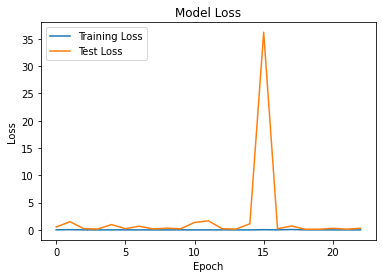

In [42]:
# plot the loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.legend(['Training Loss', 'Test Loss'], loc = 'upper left')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

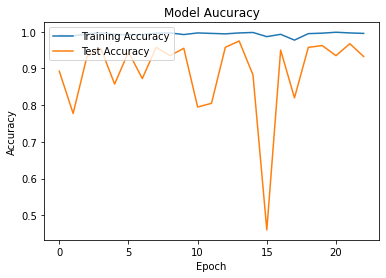

In [43]:
# plot the accuracy

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc = 'upper left')
plt.title('Model Aucuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [44]:
y_pred = model.predict([X_test_img, X_test_canny])
y_pred

array([[9.76851881e-01],
       [5.17653416e-06],
       [1.34921752e-14],
       [1.01233041e-18],
       [3.12764314e-07],
       [1.23472512e-01],
       [1.00000000e+00],
       [4.09570537e-11],
       [6.43706768e-13],
       [4.62819144e-10],
       [9.48306024e-01],
       [5.97719861e-07],
       [6.28126800e-01],
       [5.60996138e-09],
       [5.43538392e-01],
       [3.75918776e-01],
       [7.38157660e-11],
       [9.99995351e-01],
       [8.70890702e-08],
       [2.18655005e-09],
       [1.00000000e+00],
       [6.35783999e-06],
       [9.99996305e-01],
       [9.08945008e-09],
       [1.91967260e-08],
       [3.37315896e-07],
       [3.90748415e-12],
       [2.97959796e-05],
       [1.00000000e+00],
       [2.33583037e-08],
       [2.45755127e-09],
       [7.40619659e-01],
       [4.40609604e-10],
       [3.68580805e-10],
       [1.46027613e-12],
       [1.44665053e-12],
       [9.76907611e-01],
       [9.99937057e-01],
       [5.24865811e-11],
       [9.99890089e-01],


In [45]:
pred = []
for i in y_pred:
  if i[0] < 0.5:
    pred.append(0)

  else:
    pred.append(1)

In [46]:
pred

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,


In [ ]:
# y_true1 = ([X_test_img, X_test_canny]).classes


In [47]:
len(pred)

401

In [49]:
#len(y_true1)

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [51]:
cm = confusion_matrix(y_test_img,pred)
cm

array([[180,   1],
       [ 26, 194]])

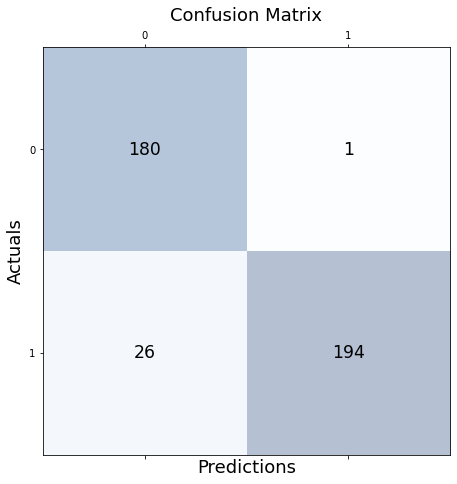

In [52]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

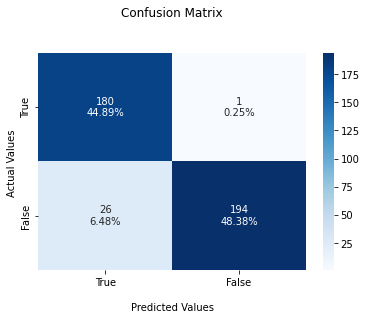

In [53]:
import seaborn as sns

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [54]:
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Precision: %.3f' % precision_score(y_test_img,pred))

print('Recall: %.3f' % recall_score(y_test_img,pred))

print('Accuracy: %.3f' % accuracy_score(y_test_img,pred))

print('F1 Score: %.3f' % f1_score(y_test_img,pred))

Precision: 0.995
Recall: 0.882
Accuracy: 0.933
F1 Score: 0.935


In [55]:
target_names = ['OKC', 'Non-OKC']
print(classification_report(y_test_img,pred, target_names=target_names))

              precision    recall  f1-score   support

         OKC       0.87      0.99      0.93       181
     Non-OKC       0.99      0.88      0.93       220

    accuracy                           0.93       401
   macro avg       0.93      0.94      0.93       401
weighted avg       0.94      0.93      0.93       401



In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test_img, pred)

In [58]:
print('roc_auc_score :', roc_auc_score(y_test_img, pred))

roc_auc_score : 0.9381466599698645


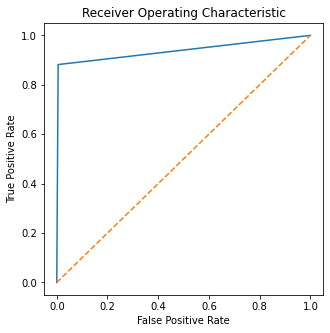

roc_auc_score : 0.9381466599698645


In [59]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('roc_auc_score :', roc_auc_score(y_test_img, pred))

In [60]:
model.save('/content/drive/MyDrive/Canny/Nivedan_Functional_3_Accuracy_93.2.h5')